In [33]:
import pandas as pd
import numpy as np
import calendar

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import TimeSeriesSplit

In [2]:
como = pd.read_csv('Project - 3 - India_Key_Commodities_Retail_Prices_1997_2015.csv')
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA


In [3]:
date = [pd.datetime.strptime(d,'%d-%m-%Y') for d in como.Date]
como['Timeindex'] = date
como['Month-year'] = como.Timeindex.dt.to_period('M')
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex,Month-year
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997-11-25,1997-11
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997-11-25,1997-11
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997-11-25,1997-11
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-25,1997-11
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997-11-25,1997-11


In [4]:
north = como[(como.Region == 'NORTH')]

In [5]:
como.Commodity.value_counts()

Onion                     115991
Rice                      115370
Tea Loose                 114495
Tur/Arhar Dal             114224
Sugar                     106953
Salt Pack (Iodised)        93451
Milk                       85848
Tomato                     54578
Sunflower Oil (Packed)     45762
Name: Commodity, dtype: int64

In [6]:
impcomo = ['Onion','Rice', 'Tea Loose','Tur/Arhar Dal','Sugar' ]

In [12]:
Onion = north[north.Commodity == impcomo[0]].groupby('Month-year').mean()
rice = north[north.Commodity == impcomo[1]].groupby('Month-year').mean()
tea = north[north.Commodity == impcomo[2]].groupby('Month-year').mean()
dal = north[north.Commodity == impcomo[3]].groupby('Month-year').mean()
sugar = north[north.Commodity == impcomo[4]].groupby('Month-year').mean()

In [17]:
Onion.columns = ['Onion']
rice.columns = ['Rice']
tea.columns = ['Tea']
dal.columns = ['Dal']
sugar.columns=['sugar']

In [24]:
impcomdf = pd.concat([Onion, rice,tea,dal,sugar], axis=1)

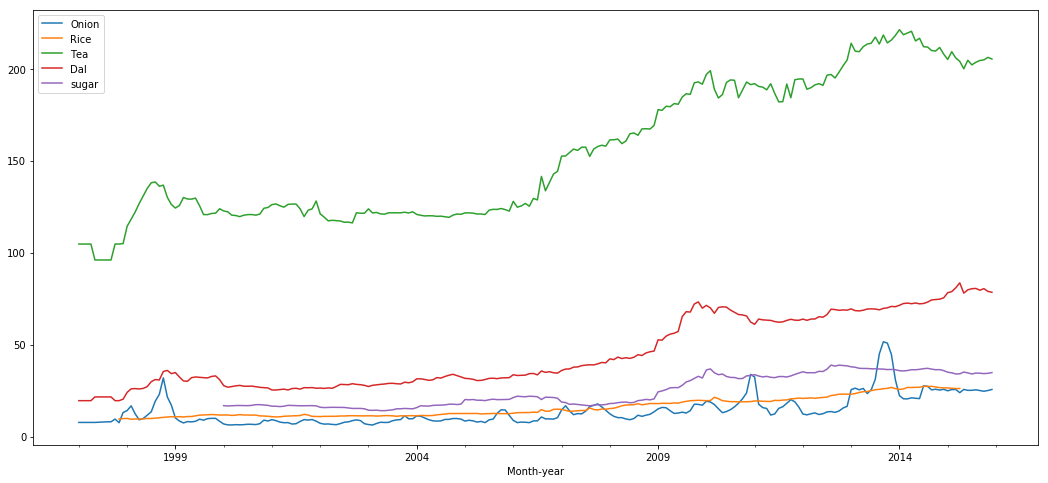

In [31]:
impcomdf.plot(figsize=(18,8))
plt.savefig('trend')
plt.show()

In [35]:
rice=rice.reindex(pd.period_range(rice.index[0],rice.index[-1], freq='M'))
rice.head()

,Rice
1997-11,9.500000
1997-12,9.742424
1998-01,9.847458
1998-02,9.412037
1998-03,9.527778


In [37]:
tsplit = TimeSeriesSplit(max_train_size=0.7,n_splits=2)

In [42]:
tsplit.split(rice)

<generator object TimeSeriesSplit.split at 0x0000025D6C250840>

In [ ]:
tsplit.